### Teorema central del límite

La suma de un gran número de variables aleatorias independientes y con la misma distribución tiende a seguir una distribución normal, sin importar la forma de la distribución original.

### Ley de los grandes números
A medida que aumenta el tamaño de una muestra aleatoria, la media de esa muestra tiende a acercarse más a la media de la población de la que se extrajo la muestra


Media: 4.00
Desvisión típica: 0.06


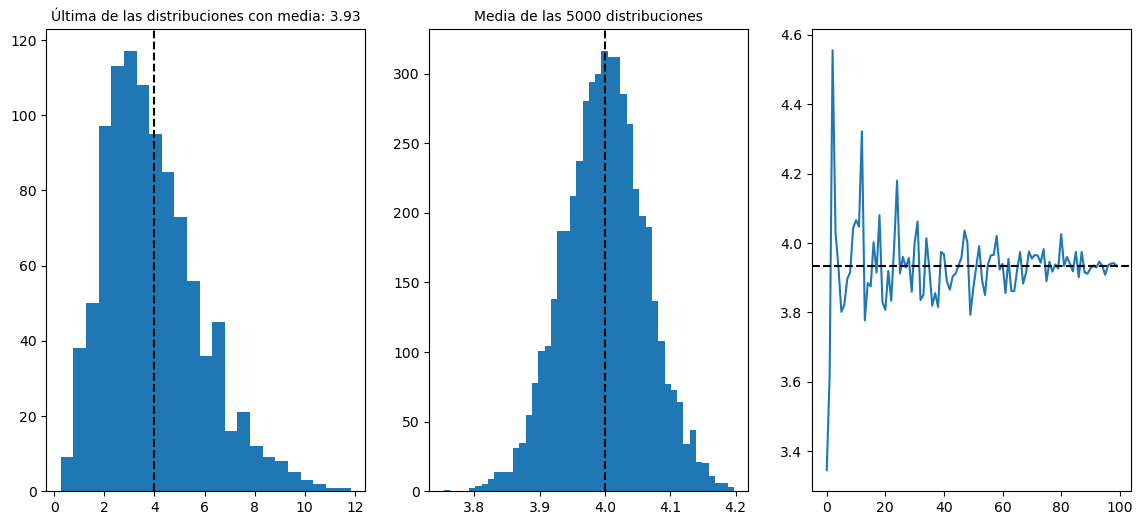

In [57]:
import numpy as np
import statistics
import matplotlib.pyplot as plt
from scipy.stats import (gamma, poisson, binom)

np.random.seed(2)

n_times = 5000
data_size = 1000
different_dist_means = []
last_dist_means = []


for i in range(n_times):
    data = gamma.rvs(a=4, size=data_size)
    # data = poisson.rvs(mu=3, size=data_size)
    # data = binom.rvs(n=10,p=0.8,size=data_size)
    different_dist_means.append(data.mean())


for s in np.linspace(2,data_size,100, dtype=int):
    last_dist_means.append(np.random.choice(data, size=s, replace=False).mean())

d_m = statistics.mean(different_dist_means)
d_std = statistics.stdev(different_dist_means)
last_dist_mean = data.mean()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(14,6))
ax1.hist(data, bins='auto')
ax2.hist(different_dist_means, bins='auto')
ax3.plot(last_dist_means)
ax1.axvline(d_m, color='black', linestyle='--')
ax2.axvline(d_m, color='black', linestyle='--')
ax3.axhline(last_dist_mean, color='black', linestyle='--')
ax1.set_title(f'Última de las distribuciones con media: {last_dist_mean:.2f}', fontsize=10)
ax2.set_title(f'Media de las {n_times} distribuciones', fontsize=10)
print('Media: {:.2f}\nDesvisión típica: {:.2f}'.format(d_m,d_std))
plt.show()